In [1]:
# Importing needed libraries
import datetime
import pandas as pd

# Fetching the data from official site of Ministry of Health and Family Welfare | Government of India
try:
    url = "https://www.mohfw.gov.in/"
    dfs = pd.read_html(url)



    for i in range(len(dfs)):
        df = dfs[i]
        if (len(df.columns) == 6):
            cols_match = sum(df.columns==['S. No.', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
                               'Total Confirmed cases ( Foreign National )', 'Cured/Discharged/Migrated', 'Death'])
            if (cols_match == 6):
                now = datetime.datetime.now()
                dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
                df.to_csv("/home/cipher/covid_19.csv")
                break
except:
    df = pd.read_csv("/home/cipher/covid_19.csv")
    df = df.drop(columns=["Unnamed: 0"]) 
    now = datetime.datetime.fromtimestamp(os.path.getmtime("/home/cipher/covid_19.csv"))
    dt_string = dt_ = t.strftime("%d/%m/%Y %H:%M:%S")

df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Death
0,1,Andhra Pradesh,8,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,29,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,37,0,3,1
8,9,Kerala,87,8,4,0
9,10,Madhya Pradesh,7,0,0,0


In [2]:
# Fetching out the values from the DataFrame 
m = len(df) - 1
states = df["Name of State / UT"][:m]
cases = df["Total Confirmed cases (Indian National)"][:m].astype(int) + df["Total Confirmed cases ( Foreign National )"][:23].astype(int)
casualties = df["Death"][:m].astype(int)

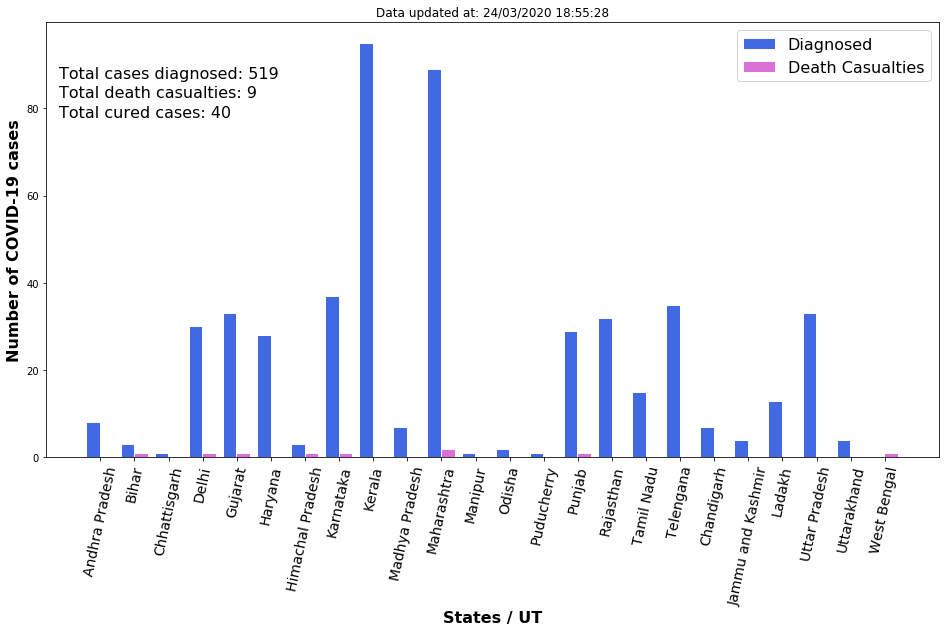

In [3]:
# Plotting the bar graph!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

max_cases = max(df["Total Confirmed cases (Indian National)"][:m].astype(int))
total_cases_diagnosed = df["Total Confirmed cases (Indian National)"][m].astype(int) + df["Total Confirmed cases ( Foreign National )"][m].astype(int)
total_death_casualties = df["Death"][m]
total_cases_cured = df["Cured/Discharged/Migrated"][m]
barWidth = 0.4
r1 = np.arange(len(cases))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16, 8))
plt.bar(r1, cases, color="royalblue", width=barWidth, edgecolor="white", label="Diagnosed")
plt.bar(r2, casualties, color="orchid", width=barWidth, edgecolor="white", label="Death Casualties")
plt.xlabel("States / UT", fontweight="bold", fontsize=16)
plt.xticks([r + barWidth - 0.19 for r in range(len(cases))], states, rotation="78", fontsize=14)
plt.ylabel("Number of COVID-19 cases", fontweight="bold", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.text(-1, max_cases, "Total cases diagnosed: " + str(total_cases_diagnosed), fontsize=16)
plt.text(-1, max_cases - 4.5, "Total death casualties: " + str(total_death_casualties), fontsize=16)
plt.text(-1, max_cases - 9.0, "Total cured cases: " + str(total_cases_cured), fontsize=16)
plt.title("Data updated at: " + dt_string, loc="center")
plt.show()

In [4]:
# Just drawing a comparison of the source of spread, are these locals spreading now or foreign people in here!
indian_nationals = sum(df["Total Confirmed cases (Indian National)"][:m].astype(int))
foreign_nationals = sum(df["Total Confirmed cases ( Foreign National )"][:m].astype(int))

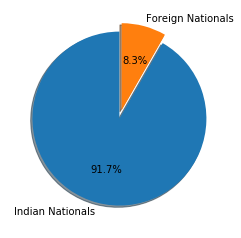

In [5]:
# A more visualistic comparison!
sizes=[indian_nationals, foreign_nationals]
names=["Indian Nationals", "Foreign Nationals"]
plt.pie(sizes, explode=(0, 0.1), labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

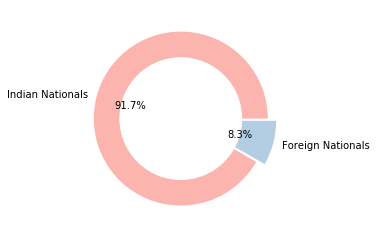

In [6]:
# In case you need a more fancy donut-like graph!
from palettable.colorbrewer.qualitative import Pastel1_7
sizes=[indian_nationals, foreign_nationals]
names=["Indian Nationals", "Foreign Nationals"]
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(sizes, labels=names, colors=Pastel1_7.hex_colors, autopct='%1.1f%%', explode=(0, 0.1))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()